In [1]:
library(tidyverse)


-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
v ggplot2 3.2.1     v purrr   0.3.3
v tibble  2.1.3     v dplyr   0.8.3
v tidyr   1.0.0     v stringr 1.4.0
v readr   1.3.1     v forcats 0.4.0
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()


#### Creating a ggplot

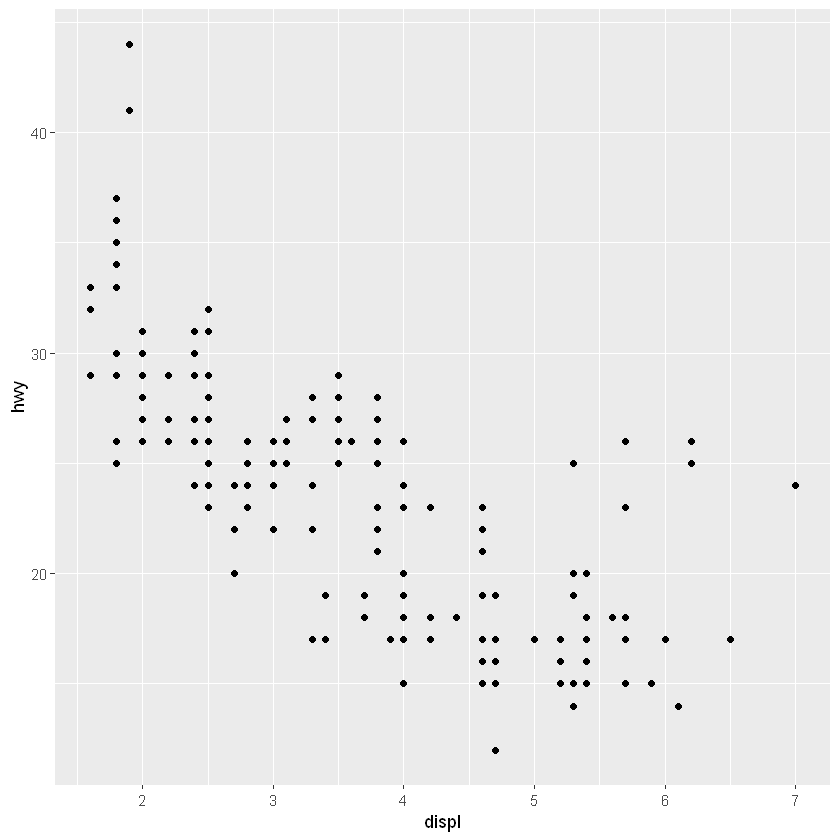

In [2]:
ggplot(data = mpg) + 
  geom_point(mapping = aes(x = displ, y = hwy))

### 3.2.4 Exercises
#### Run ggplot(data = mpg). What do you see? 
_Nothing is displayed because we have not specified what goes to the X or Y axis_

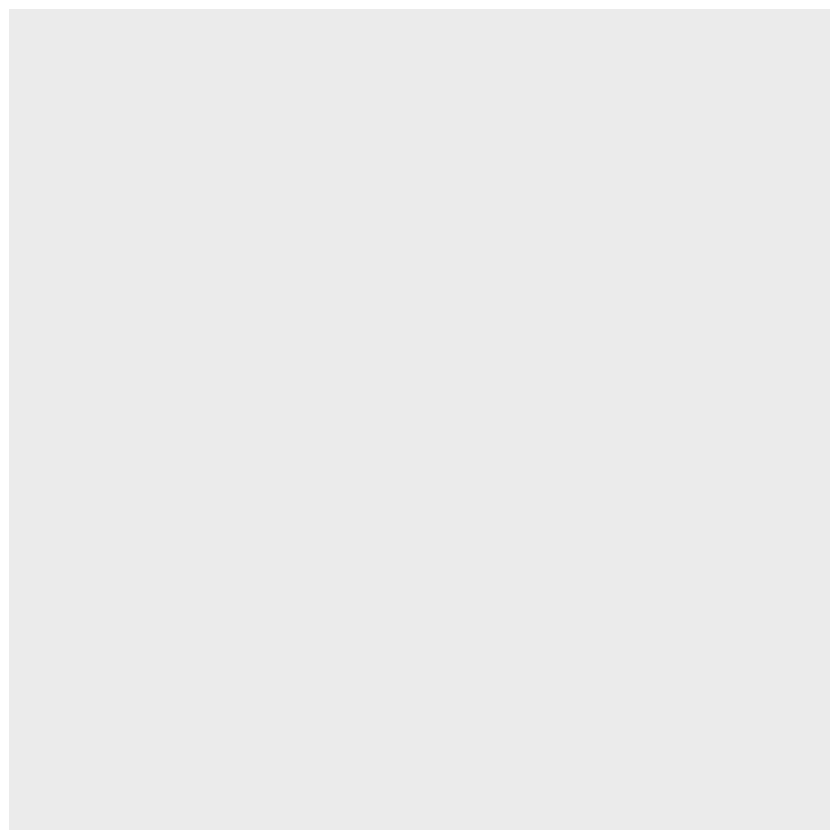

In [3]:
ggplot(data = mpg)

#### How many rows are in mpg? How many columns? 
_dim(mpg)_ shows the number of rows 234 and columns 11

In [7]:
dim(mpg)

[1] 234  11

##### What does the drv variable describe? Read the help for ?mpg to find out.  

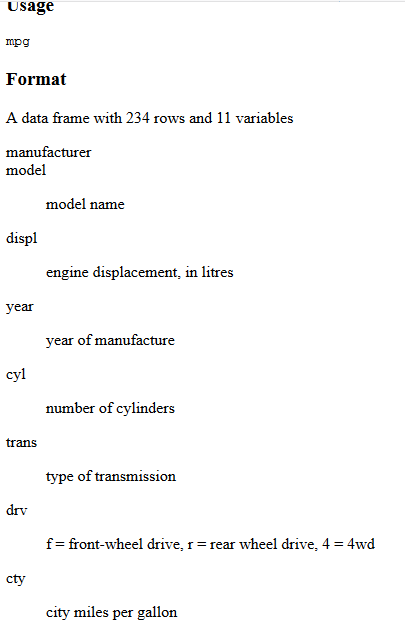

#### Make a scatterplot of hwy vs cyl.

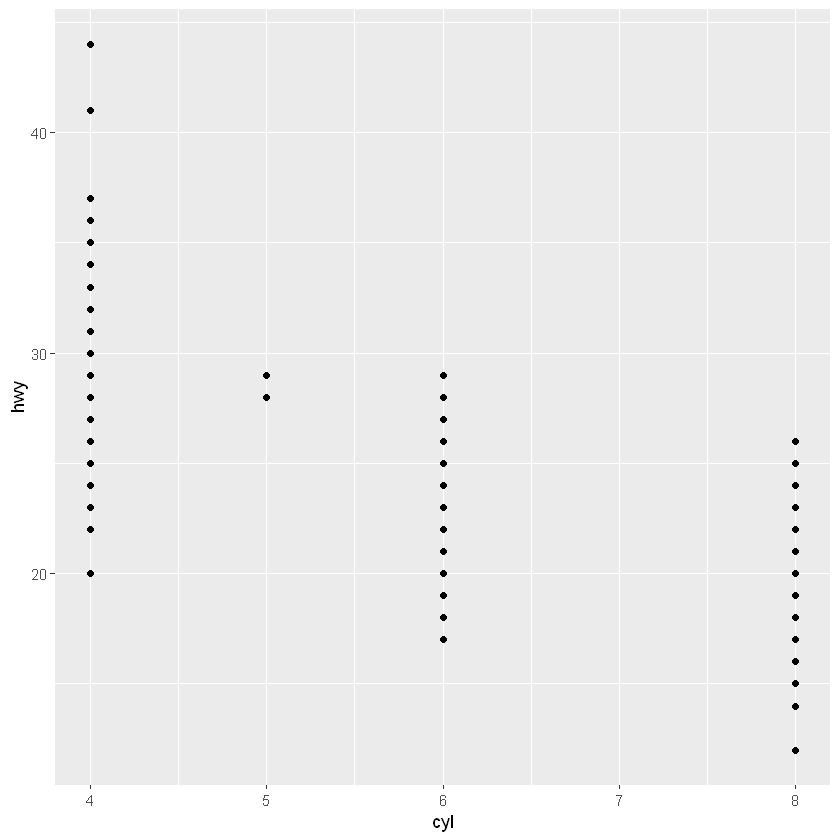

In [11]:
ggplot(data = mpg)+
    geom_point(mapping=aes(x=cyl,y=hwy))

##### What happens if you make a scatterplot of class vs drv? Why is the plot not useful?
_Both drv and class are categorical variables. The scatter plot only shows us instances e.g. There are 4wd that are compact but no 4wd is a 2 seater but we don't get to see how many these are_

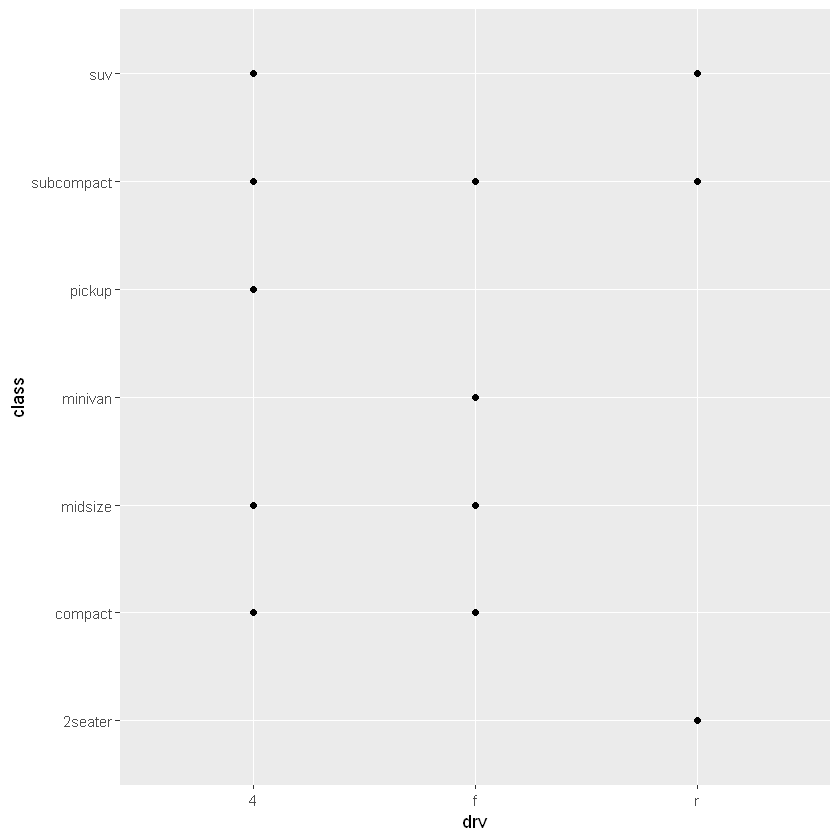

In [12]:
ggplot(data = mpg)+
    geom_point(mapping=aes(x=drv,y=class))

##### What’s gone wrong with this code? Why are the points not blue?
_The points are not blue because the color layer is specified within the aes mapping. Aes is for attributes_

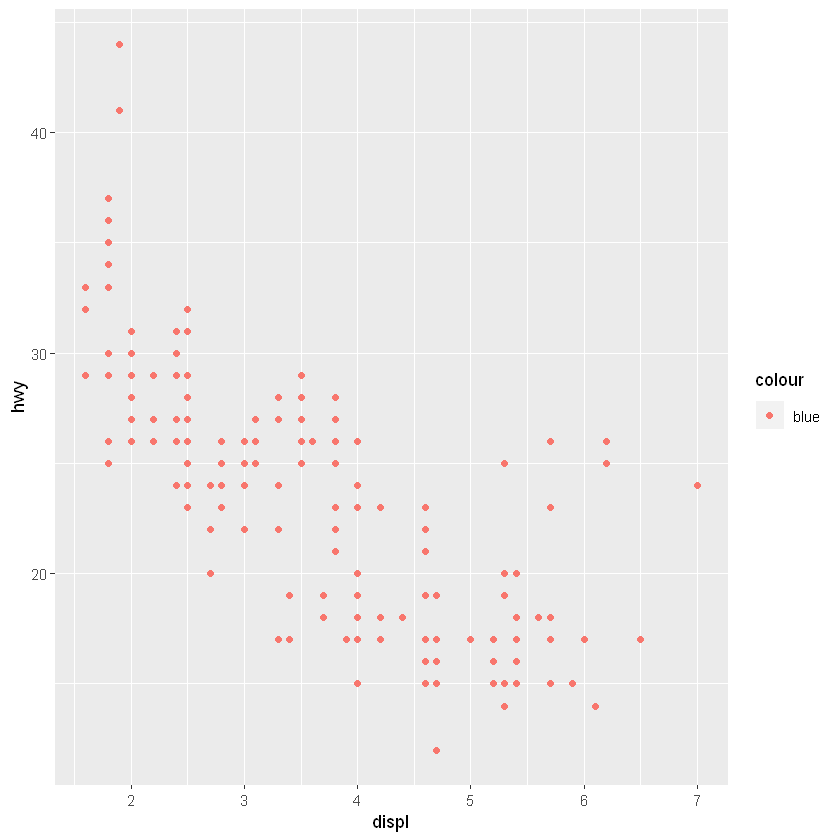

In [13]:
ggplot(data = mpg) + 
  geom_point(mapping = aes(x = displ, y = hwy, color = "blue"))

##### Which variables in mpg are categorical? 
_The details under the column names **chr** variables are likely categorical_
#### Which variables are continuous?
_The details under the column names **int** variables are thus continuous_
#### How can you see this information when you run mpg?
_By reading through the column descriptions as shown in ?mpg_

In [19]:
?mpg
head(mpg,1)

manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<chr>,<int>,<int>,<chr>,<chr>
audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact


#####   Map a continuous variable to color, size, and shape. How do these aesthetics behave differently for categorical vs. continuous variables?
_A continuous variable cannot be mapped to shape_

ERROR while rich displaying an object: Error: A continuous variable can not be mapped to shape

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
7. repr::mime2repr[[mime]](obj)
8. repr_text.default(obj)
9. past

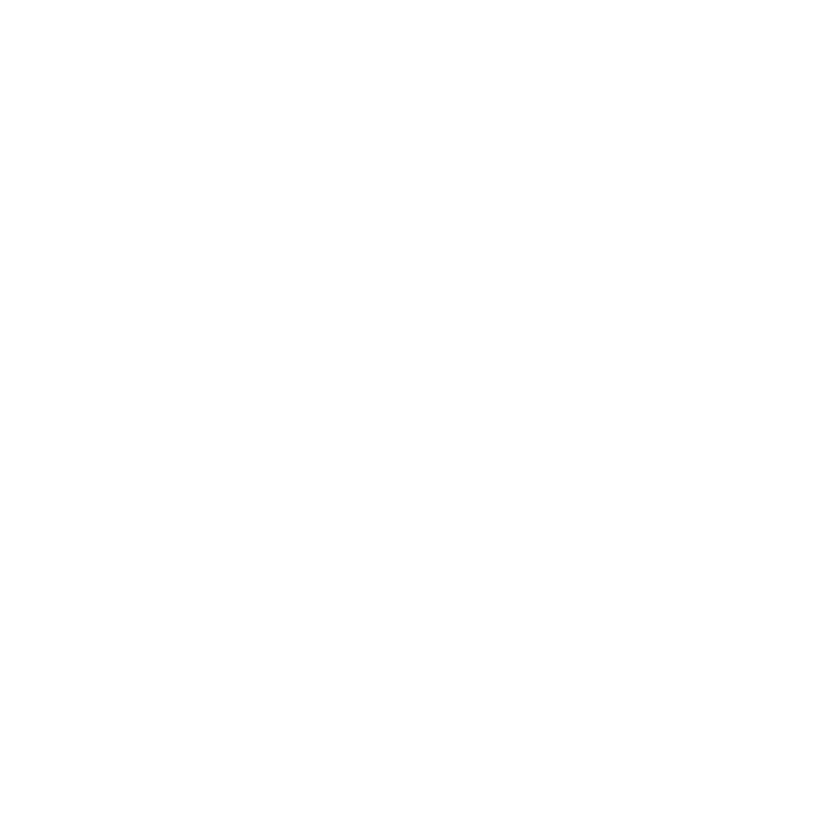

In [23]:
ggplot(data = mpg) + 
geom_point(mapping = aes(x = displ, y = hwy, color = year, size = cty, shape = hwy))

_Using size for a categorical variable is not advised_
_using a categorical variable with more than 6 items should not be used witj shape aesthetic_

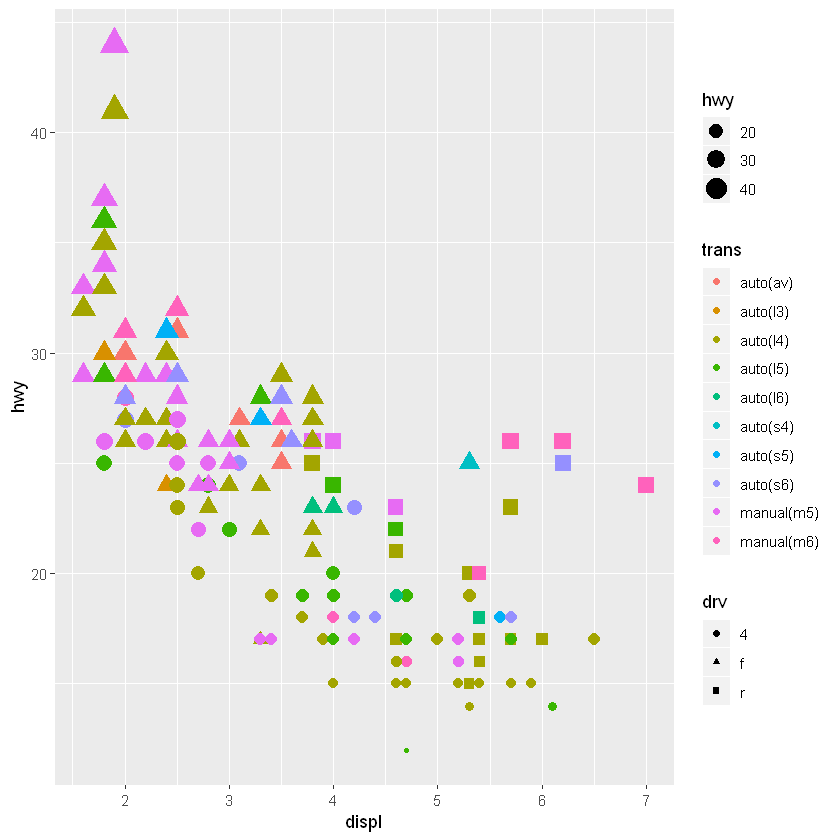

In [28]:
ggplot(data = mpg) + 
geom_point(mapping = aes(x = displ, y = hwy, color = trans, size = hwy, shape = drv))

#### What happens if you map the same variable to multiple aesthetics?
_both aesthetic layers are applied to the variable_

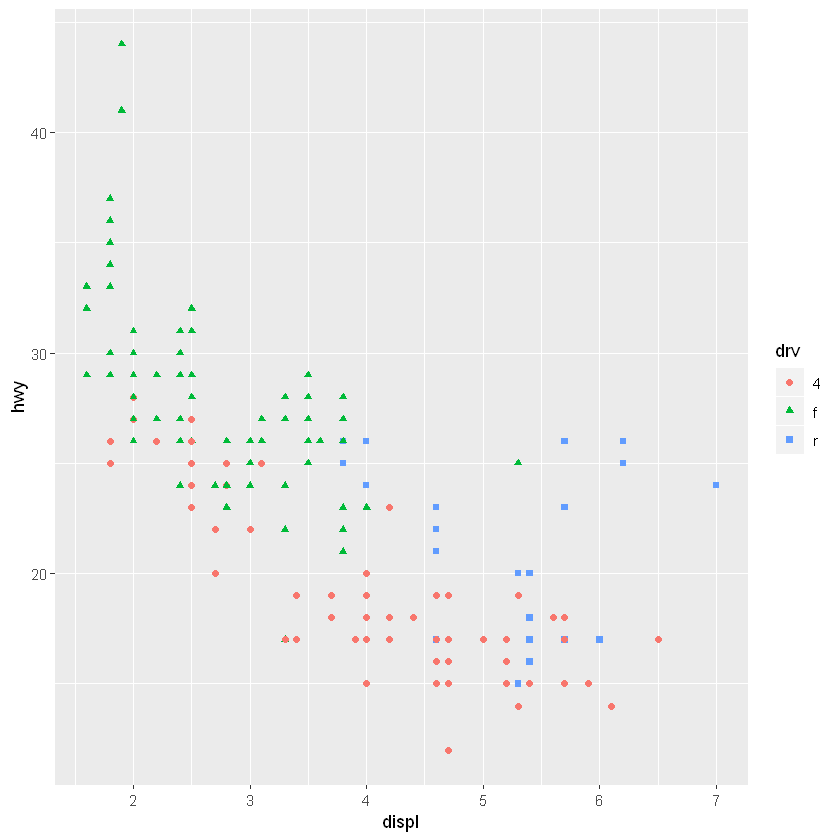

In [30]:
ggplot(data = mpg) + 
geom_point(mapping = aes(x = displ, y = hwy, color = drv, shape = drv))

#### What does the stroke aesthetic do? What shapes does it work with? (Hint: use ?geom_point)
_The stroke aesthetic adjusts the plotted object thickness and size_

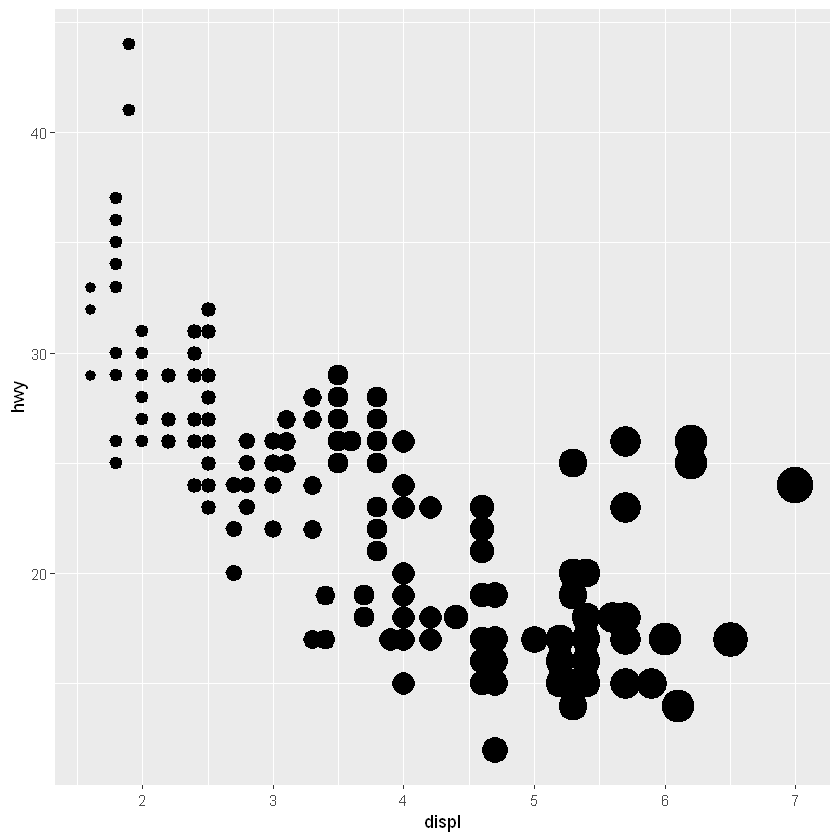

In [39]:
ggplot(data = mpg) + 
geom_point(mapping = aes(x = displ, y = hwy, stroke = displ))

#### What happens if you map an aesthetic to something other than a variable name, like aes(colour = displ < 5)? Note, you’ll also need to specify x and y.
_The color aesthetic is applied based on the evaluated value. In this case, cyl <5 = True get color blue and the rest Red_


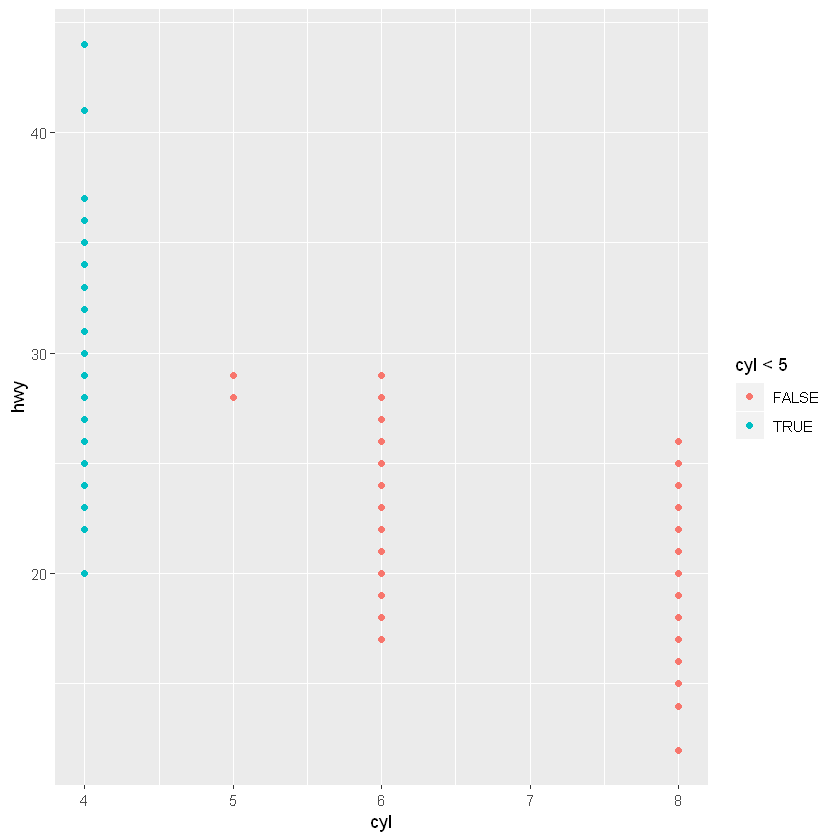

In [43]:
ggplot(data = mpg) + 
geom_point(mapping = aes(x = cyl, y = hwy, colour = cyl < 5))

#### What happens if you facet on a continuous variable?
_There is one facet for each value_

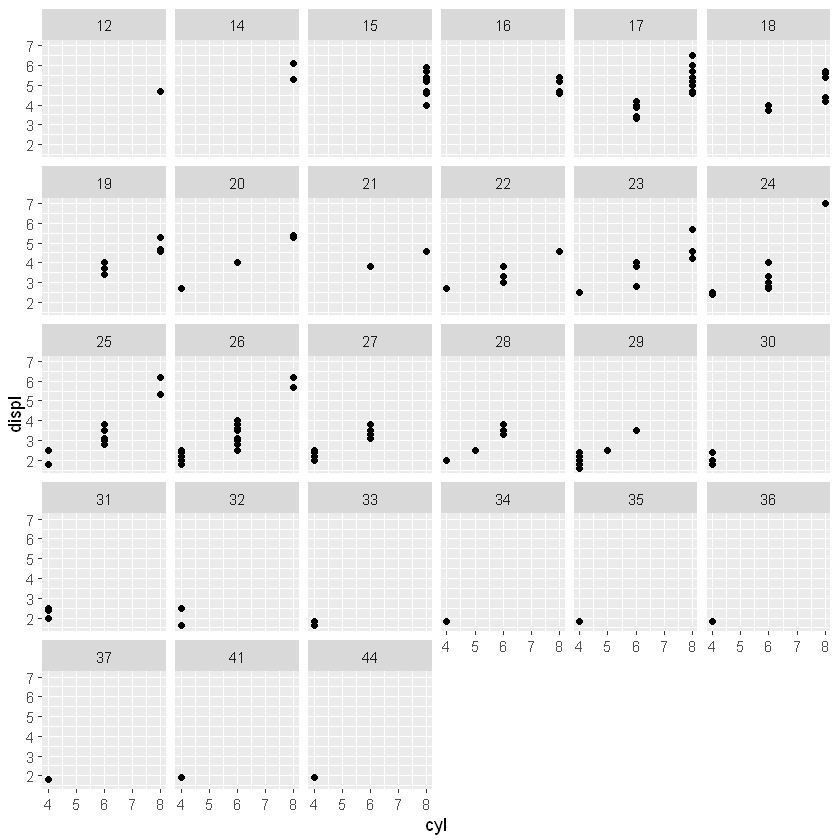

In [51]:
ggplot(data = mpg) + 
  geom_point(mapping = aes(x = cyl, y = displ)) + 
  facet_wrap(~ hwy)

#### What do the empty cells in plot with facet_grid(drv ~ cyl) mean? How do they relate to this plot?
_There is no data for the combination. E.g. rear wheel drive (r) with 4 cylinders is not listed_

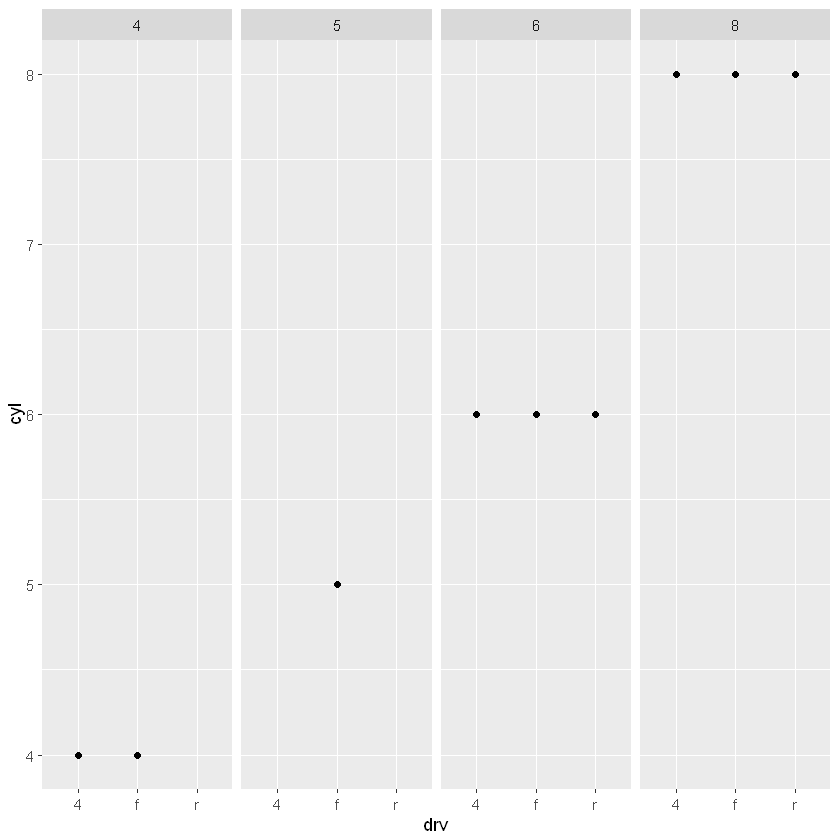

In [53]:
ggplot(data = mpg) + 
  geom_point(mapping = aes(x = drv, y = cyl))+ 
  facet_grid(~ cyl)


#### What plots does the following code make? What does . do?
_It shows the different plots in a row by the facet. The X axis is 1 while the Y axis is repeated for each row/facet_

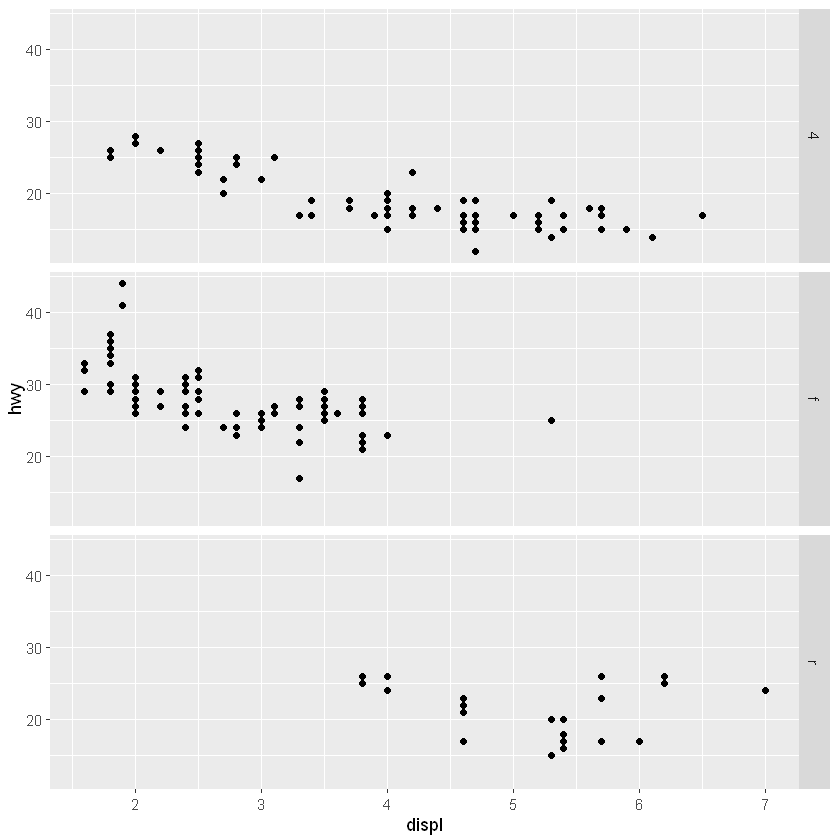

In [56]:
ggplot(data = mpg) + 
  geom_point(mapping = aes(x = displ, y = hwy)) +
  facet_grid(drv ~.)

_This shows the plots and arranges by column. The Y axis is one for all the facets while the X axis is repeated for each facet_

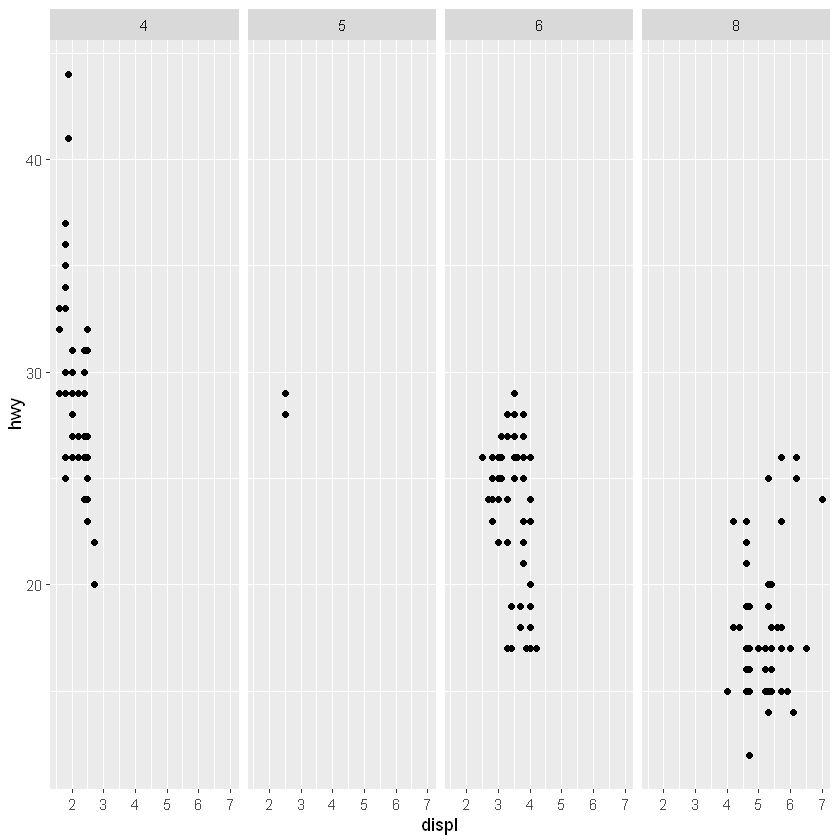

In [57]:
ggplot(data = mpg) + 
  geom_point(mapping = aes(x = displ, y = hwy)) +
  facet_grid(. ~ cyl)

#####  What are the advantages to using faceting instead of the colour aesthetic? What are the disadvantages? How might the balance change if you had a larger dataset?
_With facets you are able to clearly see how the data for each class is clustered. While with coloring you are able to clearly see how the classes are clustered against each other_

With larger data sets it's easier to see clusters against the classes thus color aesthetic is better_

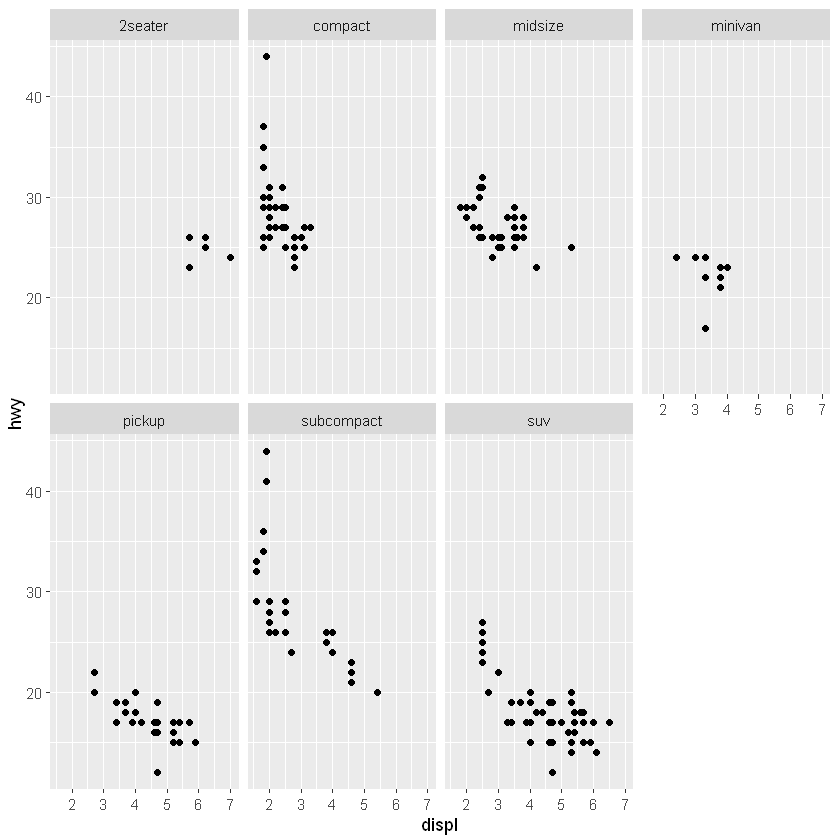

In [60]:
ggplot(data = mpg) + 
  geom_point(mapping = aes(x = displ, y = hwy)) + 
  facet_wrap(~ class, nrow = 2)

##### Read ?facet_wrap. What does nrow do? What does ncol do? What other options control the layout of the individual panels? Why doesn’t facet_grid() have nrow and ncol arguments?
_nrow - Number of rows_  
_ncol - Number of columns._  
_scales 	- Should scales be fixed ("fixed", the default), free ("free"), or free in one dimension ("free_x", "free_y")?_  
_shrink -If TRUE, will shrink scales to fit output of statistics, not raw data. If FALSE, will be range of raw data before statistical summary._

In [61]:
?facet_wrap

#####  When using facet_grid() you should usually put the variable with more unique levels in the columns. Why?
_It's easier to see the actual values and the relationship between the X and Y axis_

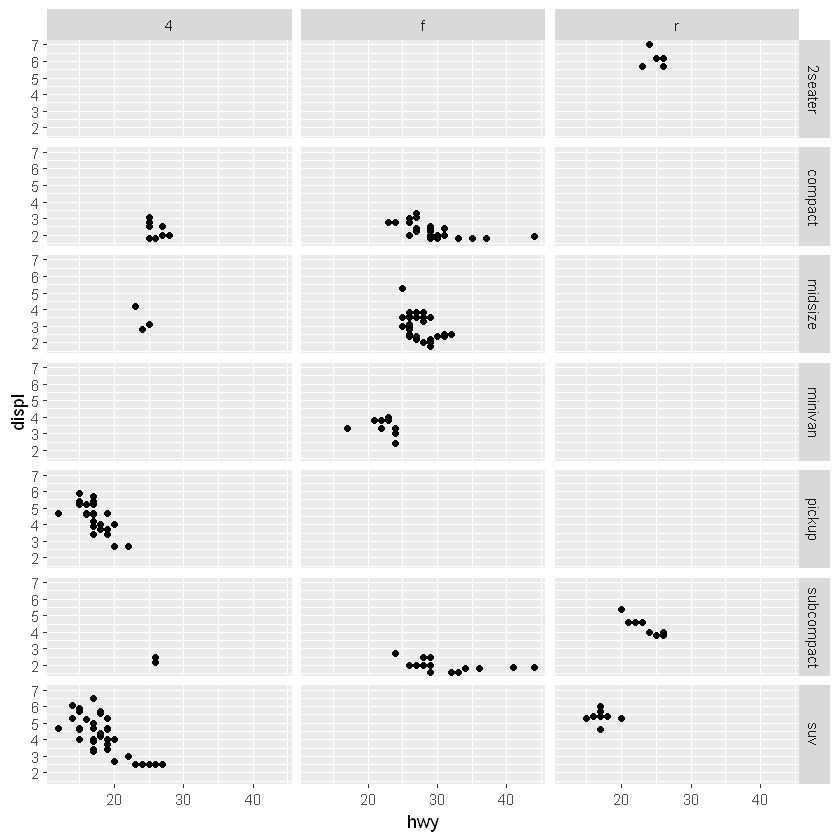

In [66]:
ggplot(data = mpg) + 
  geom_point(mapping = aes(x = hwy, y = displ)) + 
  facet_grid(class ~ drv)